   ## Car Price Prediction



Problem: Develop a machine learning model to predict car prices based on features such as brand, engine size, fuel type, etc. Compare Ridge and Lasso regression models.

Objectives (Week 1):
1) Perform Exploratory Data Analysis (EDA)
2) Visualize data using plot
3) Identify potential features and target variable.

Data used from Kaggle: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?resource=download

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# download the dataset from: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:

#  Perform Exploratory Data Analysis (EDA)
#  Check missing values
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [4]:
# Check outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

z_scores = stats.zscore(df[numeric_cols])

threshold_z = 3
outlier_mask = z_scores > threshold_z

outlier_counts = outlier_mask.sum(axis=0)

summary = pd.DataFrame({
    'Column': numeric_cols,
    '# of Outliers': outlier_counts,
    'Notes': ['Mild outliers, keep them' if count <= 5 else 'Extreme values, consider removal'
              for count in outlier_counts]
})

print(summary)


              Column  # of Outliers                             Notes
0             car_ID              0          Mild outliers, keep them
1          symboling              0          Mild outliers, keep them
2          wheelbase              1          Mild outliers, keep them
3          carlength              0          Mild outliers, keep them
4           carwidth              0          Mild outliers, keep them
5          carheight              0          Mild outliers, keep them
6         curbweight              0          Mild outliers, keep them
7         enginesize              5          Mild outliers, keep them
8          boreratio              0          Mild outliers, keep them
9             stroke              0          Mild outliers, keep them
10  compressionratio              9  Extreme values, consider removal
11        horsepower              2          Mild outliers, keep them
12           peakrpm              2          Mild outliers, keep them
13           citympg

In [5]:
# Check data imbalance

# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Loop through each categorical column
for col in categorical_cols:
    print(f"Column: {col}")
    class_counts = df[col].value_counts()
    print("\n")
    print("Counts:")
    print(class_counts)
    
    class_percentages = df[col].value_counts(normalize=True) * 100
    print("\nPercentages:")
    print(class_percentages.round(2))
    print("\n")
    print("-------")

Column: CarName


Counts:
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

Percentages:
CarName
toyota corona           2.93
toyota corolla          2.93
peugeot 504             2.93
subaru dl               1.95
mitsubishi mirage g4    1.46
                        ... 
mazda glc 4             0.49
mazda rx2 coupe         0.49
maxda glc deluxe        0.49
maxda rx3               0.49
volvo 246               0.49
Name: proportion, Length: 147, dtype: float64


-------
Column: fueltype


Counts:
fueltype
gas       185
diesel     20
Name: count, dtype: int64

Percentages:
fueltype
gas       90.24
diesel     9.76
Name: proportion, dtype: float64


-------
Column: aspiration


Counts:
aspiration
std      168
tur

In [6]:
# check statistics of data set (general)
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# Visualize data using plots (histograms, scatter plots, correlation heatmaps)
# histograms for numerical features
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

From the histograms, the features with the most meaningful variation (and strong expected price relationship) are: enginesize, horsepower, curbweight, carwidth, wheelbase, carlength. These features all show: wide variation, strong right-skew (meaning luxury/premium features exist), logical relationship with price (larger or more powerful car = more expensive).

Low-value predictors include compression ratio, peak RPM, stroke, and symboling, as these show limited variation or weak connections to price.

Thus, we will confirm the importance of features such as engine size, horsepower, curb weight, wheelbase, car length, and car width using scatterplots, and further validate these findings using a correlation heatmap.

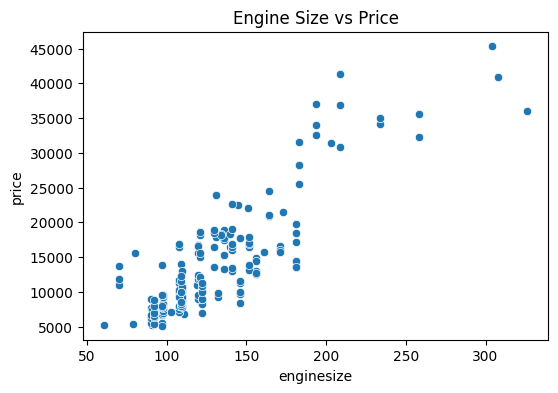

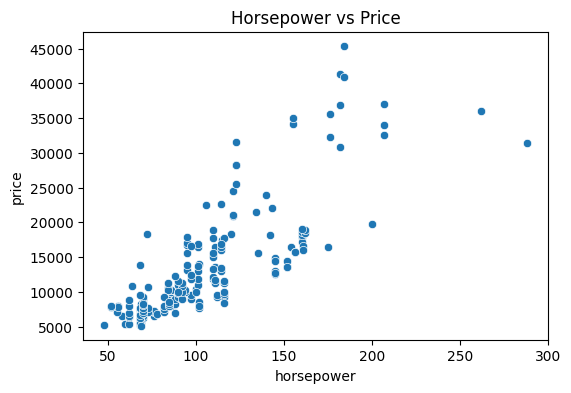

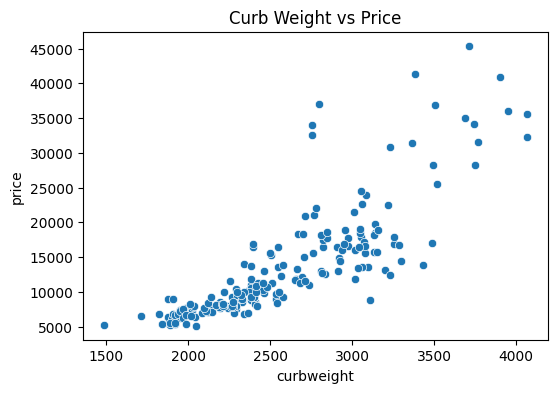

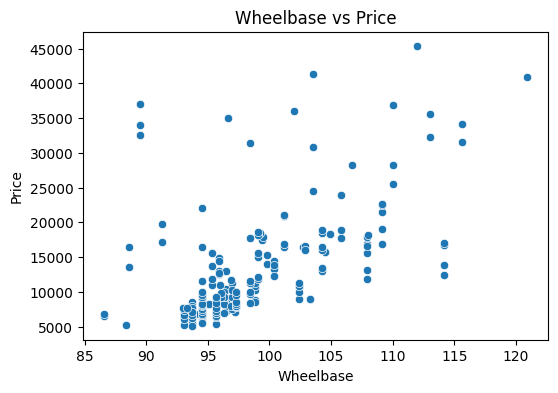

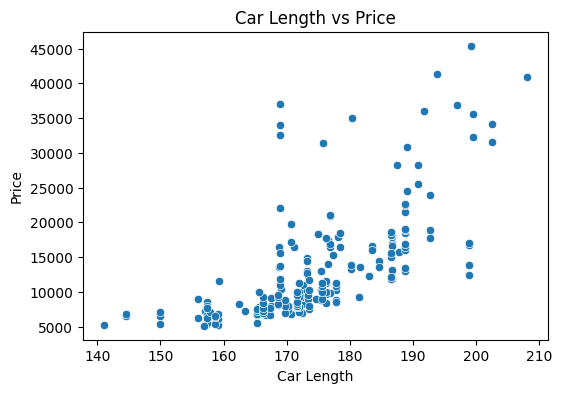

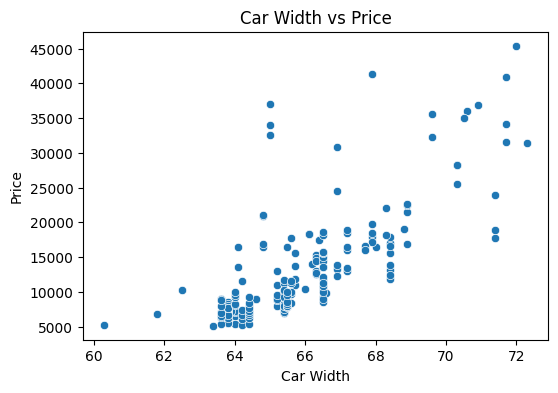

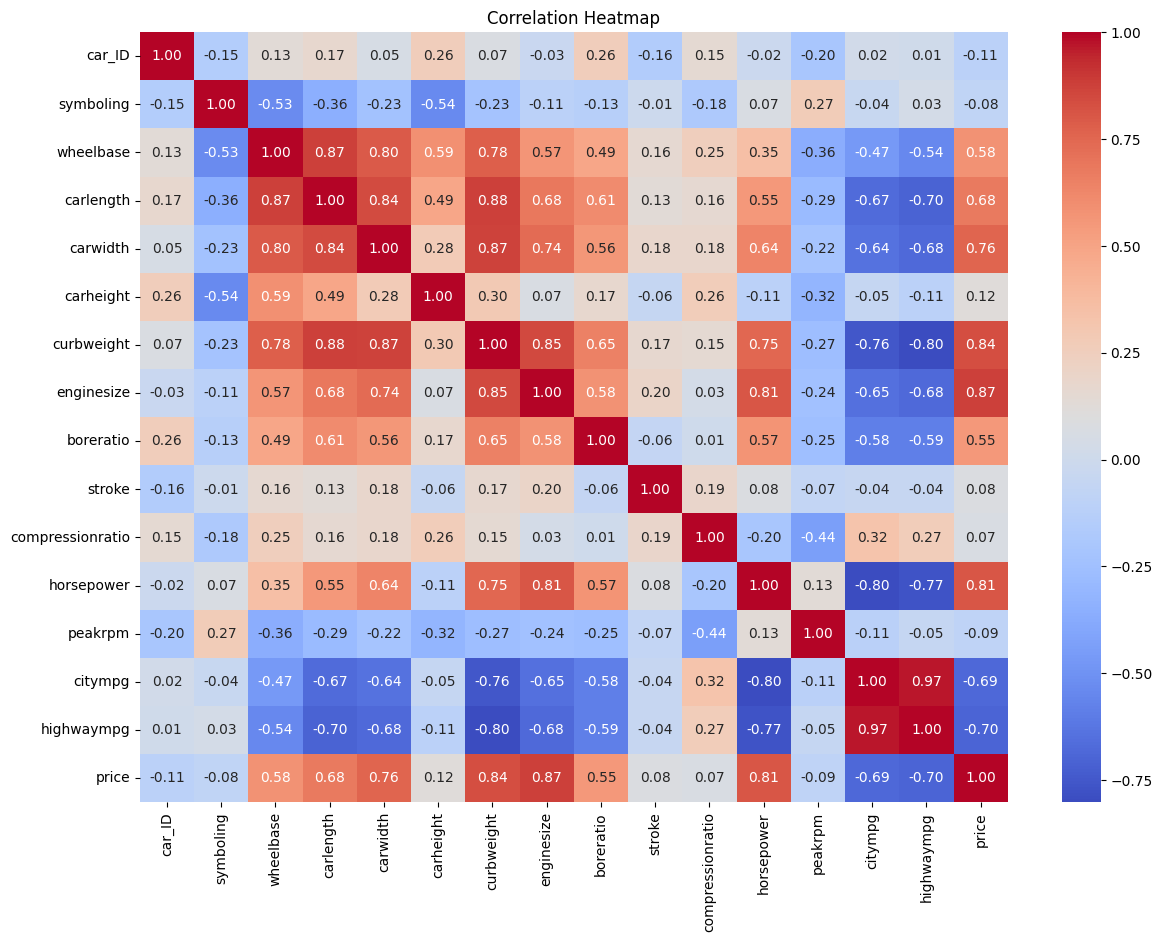

In [9]:
# scatterplots
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['enginesize'], y=df['price'])
plt.title('Engine Size vs Price')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['horsepower'], y=df['price'])
plt.title('Horsepower vs Price')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['curbweight'], y=df['price'])
plt.title('Curb Weight vs Price')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['wheelbase'], y=df['price'])
plt.title('Wheelbase vs Price')
plt.xlabel('Wheelbase')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['carlength'], y=df['price'])
plt.title('Car Length vs Price')
plt.xlabel('Car Length')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['carwidth'], y=df['price'])
plt.title('Car Width vs Price')
plt.xlabel('Car Width')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)

# heatmap correlation
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()